In [17]:
from tensorflow import keras #remember that keras is now included in tensorflow
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
import matplotlib.pyplot as plt
import random
import tensorflow as tf
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score , confusion_matrix


In [18]:
#define some parametes related to specific training problem
batch_size = 10 #reduce this if you want to run this locally, at your pc
num_classes = 10 #this is problem specific
epochs = 10 # to save some time. Typically you need more that 100.

# input image dimensions
img_rows, img_cols = 32, 32

In [19]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
#split x train to train and validation set 
(x_train,y_train),(x_valid,y_valid)=(x_train[:40000],y_train[:40000]),(x_train[40000:],y_train[40000:])

#scaling the data 
X_train= x_train/255
X_test=x_test/255
X_valid=x_valid/255

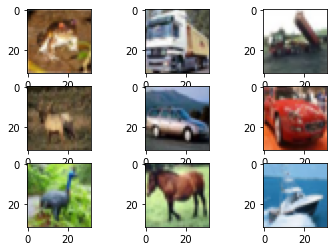

In [20]:
# plot 9 images as gray scale
plt.subplot(331)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(332)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(333)
plt.imshow(x_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(334)
plt.imshow(x_train[3], cmap=plt.get_cmap('gray'))
plt.subplot(335)
plt.imshow(x_train[4], cmap=plt.get_cmap('gray'))
plt.subplot(336)
plt.imshow(x_train[5], cmap=plt.get_cmap('gray'))
plt.subplot(337)
plt.imshow(x_train[6], cmap=plt.get_cmap('gray'))
plt.subplot(338)
plt.imshow(x_train[7], cmap=plt.get_cmap('gray'))
plt.subplot(339)
plt.imshow(x_train[8], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()
plt.pause(4)

In [22]:
# reshaping the data to appropriate tensor format
X_train = X_train.reshape(40000, 32, 32,3 )
X_test = X_test.reshape(10000, 32, 32, 3)
X_valid= X_valid.reshape(10000,32,32,3)
print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_valid.shape[0],'valid samples')
print(X_test.shape[0], 'test samples')

x_train shape: (40000, 32, 32, 3)
40000 train samples
10000 valid samples
10000 test samples


In [23]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [24]:
## define cnn model

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))



In [25]:
#do not forget to compile the structure here
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [26]:
# print model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

In [27]:

# fit model parameters, given a set of training data
history= model.fit(X_train, y_train,
          epochs=epochs,
          verbose=1,
          validation_data=(X_valid, y_valid)) 


Epoch 1/10
1250/1250 [==============================] - 9s 7ms/step - loss: 1.7235 - accuracy: 0.3649 - val_loss: 1.2914 - val_accuracy: 0.5145
Epoch 2/10
1250/1250 [==============================] - 8s 6ms/step - loss: 1.2487 - accuracy: 0.5501 - val_loss: 1.0201 - val_accuracy: 0.6322
Epoch 3/10
1250/1250 [==============================] - 8s 7ms/step - loss: 1.0249 - accuracy: 0.6360 - val_loss: 0.8919 - val_accuracy: 0.6860
Epoch 4/10
1250/1250 [==============================] - 8s 6ms/step - loss: 0.8986 - accuracy: 0.6850 - val_loss: 0.7783 - val_accuracy: 0.7297
Epoch 5/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.8136 - accuracy: 0.7147 - val_loss: 0.7654 - val_accuracy: 0.7326
Epoch 6/10
1250/1250 [==============================] - 9s 7ms/step - loss: 0.7574 - accuracy: 0.7360 - val_loss: 0.7011 - val_accuracy: 0.7574
Epoch 7/10
1250/1250 [==============================] - 8s 6ms/step - loss: 0.7062 - accuracy: 0.7521 - val_loss: 0.6713 - val_accuracy:

In [28]:
# calculate some common performance scores
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6687588095664978
Test accuracy: 0.7670999765396118


In [30]:
# saving the trained model
model_name = 'cifar10_complex_CNN.h5'
model.save(model_name)

313/313 [==============================] - 1s 2ms/step


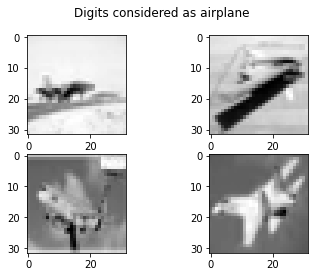

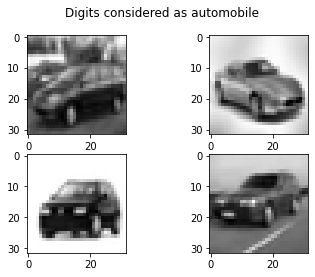

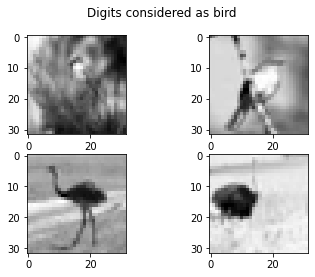

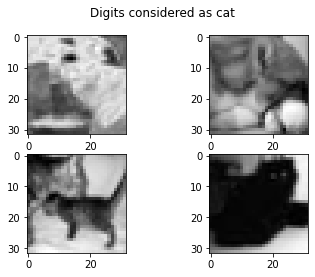

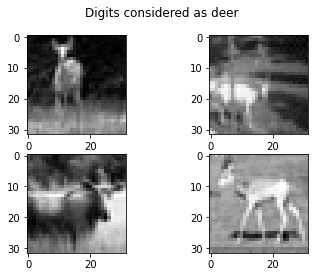

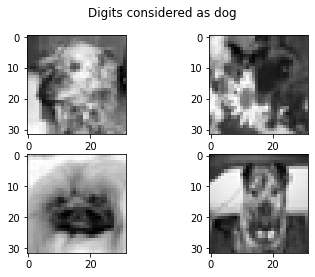

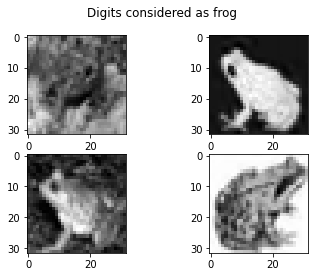

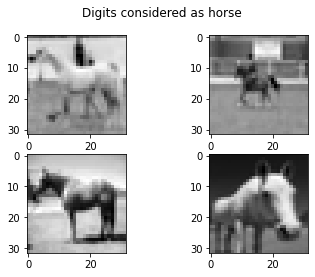

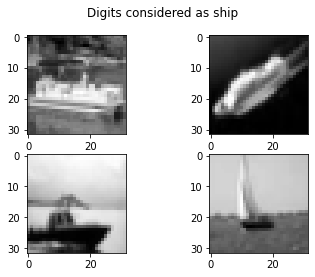

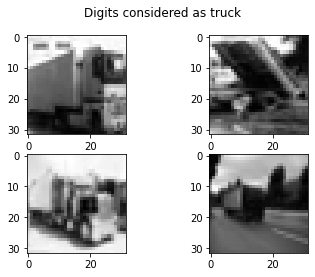

In [ ]:
# illustrate few results
# class_to_demonstrate = random.randint(0, 9)

classes=['airplane','automobile', 'bird','cat','deer','dog','frog','horse','ship','truck']
# find 9 images the corespond to the above class,
# using the actual class as outputs

class_to_demonstrate = 0
while (sum(Y_test == class_to_demonstrate) > 4):
    tmp_idxs_to_use = np.where(Y_test == class_to_demonstrate)

    # create new plot window
    plt.figure()

    # plot 4 images as gray scale
    plt.subplot(221)
    plt.imshow(x_test[tmp_idxs_to_use[0][random.randint(0,len(np.where(Y_test==class_to_demonstrate)[0]))], :, :, 0], cmap=plt.get_cmap('gray'))
    plt.subplot(222)
    plt.imshow(x_test[tmp_idxs_to_use[0][random.randint(0,len(np.where(Y_test==class_to_demonstrate)[0]))], :, :, 0], cmap=plt.get_cmap('gray'))
    plt.subplot(223)
    plt.imshow(x_test[tmp_idxs_to_use[0][random.randint(0,len(np.where(Y_test==class_to_demonstrate)[0]))], :, :, 0], cmap=plt.get_cmap('gray'))
    plt.subplot(224)
    plt.imshow(x_test[tmp_idxs_to_use[0][random.randint(0,len(np.where(Y_test==class_to_demonstrate)[0]))], :, :, 0], cmap=plt.get_cmap('gray'))
    tmp_title = 'Digits considered as ' + str(classes[class_to_demonstrate])
    plt.suptitle(tmp_title)

    # show the plot
    plt.show()
    plt.pause(2)

    # update the class to demonstrate index
    class_to_demonstrate = class_to_demonstrate + 1


IndentationError: ignored

In [ ]:
summarize_diagnostics(history)

IndentationError: ignored